## Observations and Insights 

Write at least 3 observations or inferences that can be made from the data: 

In the study there were 249 mice with SCC tumor growth. There were nine drug regimens (plush a placebo) given to the mice and the mice were observed and the tumors were measured at different timepoints throughout 45 days. 

1. For Mouse "l509," he was treated with Capomulin and his tumor was measured every 5 days for a total of 10 timepoints (starting with day 0 through 45). Mouse l509's tumor shrunk a total of 3.52 cubic millimeters. His tumor started at 45 cubic mm and after 45 days of treatement his tumor measured 41.48 cubic mm. Given the data Capomulin seems to work well with this subject.  

2. During the course of the study there were the most measurements (a little less than 250) taken with mice taking the Capomulin and a close second was Ramicane. Capomulin and Ramicane had the lowest average tumor sizes. I feel that Capomulin or Ramicane would be my drugs of choice based on the sample size and and average tumor size.     

3. The correlation between mouse weight and average tumor size is 0.84. According to the scatter plot, it shows a strong, postitive correltation, when the mouse weight increses the average tumor size gets bigger. 

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge the first two datasets on "Mouse ID" so that no data is lost (1894 rows-Study, 250 rows-Mouse)
combined_mouse_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
combined_mouse_df.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
mouse_id_count = len(combined_mouse_df["Mouse ID"])
mouse_id_count

1893

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_measurments_df = combined_mouse_df.loc[:, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen", "Sex"]]

mouse_measure_clean_df = mouse_measurments_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

mouse_measure_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex
0,k403,0,45.000000,Ramicane,Male
1,k403,5,38.825898,Ramicane,Male
2,k403,10,35.014271,Ramicane,Male
3,k403,15,34.223992,Ramicane,Male
4,k403,20,32.997729,Ramicane,Male
...,...,...,...,...,...
1888,z969,25,63.145652,Naftisol,Male
1889,z969,30,65.841013,Naftisol,Male
1890,z969,35,69.176246,Naftisol,Male
1891,z969,40,70.314904,Naftisol,Male


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = len(mouse_measure_clean_df["Mouse ID"].unique())
mouse_clean_count

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
volume_group = mouse_measure_clean_df.groupby(["Drug Regimen"])
volume_mean = volume_group["Tumor Volume (mm3)"].mean()
#volume_mean
volume_median = volume_group["Tumor Volume (mm3)"].median()
#volume_median
volume_variance = volume_group["Tumor Volume (mm3)"].var()
#volume_variance
volume_std_dev = volume_group["Tumor Volume (mm3)"].std()
#volume_std_dev
volume_sem = volume_group["Tumor Volume (mm3)"].sem()
#volume_sem

Volume_cal_df = pd.DataFrame({"Mean of Volume": volume_mean, 
                                   "Median of Volume": volume_median, 
                                   "Variance of Volume": volume_variance, 
                                   "Standard Deviation of Volume": volume_std_dev, 
                                    "SEM of Volume": volume_sem})

#Volume_cal_df["Average Purchase Price"] = gender_purchases_df["Average Purchase Price"].map("{:,.2f}".format)
#gender_purchases_df["Total Purchase Value"] = gender_purchases_df["Total Purchase Value"].map("${:,.2f}".format)
#gender_purchases_df["Avg Total Purchase per Person"] = gender_purchases_df["Avg Total Purchase per Person"].map("${:,.2f}".format)
Volume_cal_df.head(100)

,Mean of Volume,Median of Volume,Variance of Volume,Standard Deviation of Volume,SEM of Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
   
# Using the aggregation method, produce the same summary statistics in a single line

mouse_agg_clean_df = mouse_measure_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
#mouse_agg_clean_df[mean] = round(mouse_agg_clean_df["mean"],2)
#mouse_agg_clean_df
#mouse_agg_clean_df.columns 
#columns = [x for x in mouse_agg_clean_df.columns]
#mouse_agg_clean_df = mouse_agg_clean_df.rename(columns={('Tumor Volume (mm3)', 'mean'):"Mean of Volume"})
#mouse_agg_clean_df[('Tumor Volume (mm3)',   'mean')] = round(mouse_agg_clean_df[('Tumor Volume (mm3)',   'mean')],2)
mouse_agg_clean_df
#columns

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

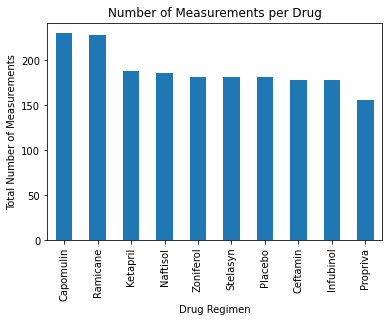

In [162]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

value_count = mouse_measure_clean_df["Drug Regimen"].value_counts()
#type(value_count)

value_count.plot(kind="bar")
plt.title("Number of Measurements per Drug")
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

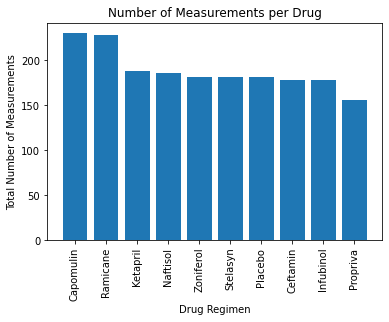

In [163]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

value_count_py = mouse_measure_clean_df["Drug Regimen"].value_counts()
plt.bar(value_count_py.index.values, value_count_py.values)
#clean up bar chart
plt.xticks(rotation=90)
plt.title("Number of Measurements per Drug")
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

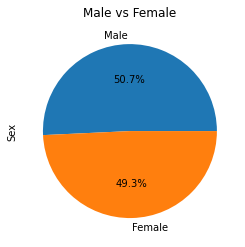

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#use the mouse_measure_clean_df, do value_counts on sex
value_count_sex = mouse_measure_clean_df["Sex"].value_counts()
#value_count_sex
value_count_sex.plot(kind="pie", autopct='%1.1f%%')
plt.title("Male vs Female")
plt.show()

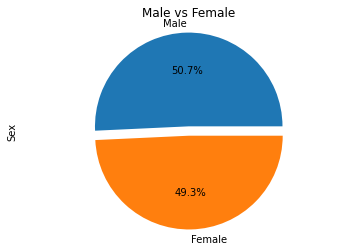

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#value counts on number of males and females: Male=958, Female=930; Name: Sex, dtype: int64
value_count_sex_plt = mouse_measure_clean_df["Sex"].value_counts()
#value_count_sex_plt

#create the label pull from df?
sex_label = ["Male", "Female"]
explode = (0.1,0)

#missing the labels

plt.pie(value_count_sex_plt.values, labels=sex_label, explode=explode, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Male vs Female")

plt.axis("equal")
plt.show()




## Quartiles, Outliers and Boxplots

In [52]:
mouse_group1_df = mouse_measure_clean_df.groupby(["Mouse ID","Timepoint", "Tumor Volume (mm3)"])

mouse_group1_df.head(25)

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen,Sex
0,k403,0,45.000000,Ramicane,Male
1,k403,5,38.825898,Ramicane,Male
2,k403,10,35.014271,Ramicane,Male
3,k403,15,34.223992,Ramicane,Male
4,k403,20,32.997729,Ramicane,Male
...,...,...,...,...,...
1888,z969,25,63.145652,Naftisol,Male
1889,z969,30,65.841013,Naftisol,Male
1890,z969,35,69.176246,Naftisol,Male
1891,z969,40,70.314904,Naftisol,Male


In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


#final_tumor_df = mouse_group_df.loc[mouse_group_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
mouse_group_df = mouse_measure_clean_df.groupby(["Mouse ID"])["Timepoint"].max()
mouse_group_df.head()


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [69]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(mouse_group_df, mouse_measure_clean_df)
merge_df.head()
final_tumor_df = merge_df.loc[merge_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor_df.head()

,Timepoint,Mouse ID,Tumor Volume (mm3),Drug Regimen,Sex
0,45,k403,22.050126,Ramicane,Male
1,45,s185,23.343598,Capomulin,Female
2,45,x401,28.484033,Capomulin,Female
3,45,m601,28.430964,Capomulin,Male
4,45,g791,29.128472,Ramicane,Male


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug = final_tumor_df["Tumor Volume (mm3)"]
quartiles = drug.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of volume is: {lowerq}")
print(f"The upper quartile of volume is: {upperq}")
print(f"The interquartile range of volume is: {iqr}")
print(f"The the median of volume is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of volume is: 37.61401068
The upper quartile of volume is: 53.24431157
The interquartile range of volume is: 15.630300890000001
The the median of volume is: 45.0 
Values below 14.168559344999998 could be outliers.
Values above 76.68976290500001 could be outliers.


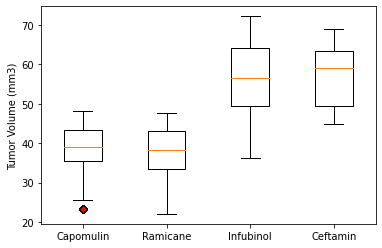

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_df = merge_df.loc[merge_df["Drug Regimen"].isin(["Capomulin"])]["Tumor Volume (mm3)"]
Ramicane_df = merge_df.loc[merge_df["Drug Regimen"].isin(["Ramicane"])]["Tumor Volume (mm3)"]
Infubinol_df = merge_df.loc[merge_df["Drug Regimen"].isin(["Infubinol"])]["Tumor Volume (mm3)"]
Ceftamin_df = merge_df.loc[merge_df["Drug Regimen"].isin(["Ceftamin"])]["Tumor Volume (mm3)"]

red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
#ax1.set_title('xx')
ax1.set_ylabel('Tumor Volume (mm3)')
x_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.boxplot([Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df], labels=x_labels, flierprops=red_diamond)

plt.show()

## Line and Scatter Plots

In [170]:
Capomulin2_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin",:]
Capomulin2_df.head()
Cap_l509_df = Capomulin2_df.loc[Capomulin2_df["Mouse ID"] == "l509",:]
Cap_l509_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


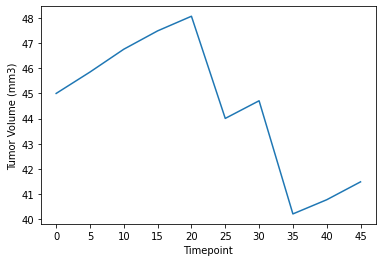

In [173]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
timepoint = Cap_l509_df.iloc[:,5]
tumor_size = Cap_l509_df.iloc[:,6]
plt.plot(timepoint,tumor_size)
plt.xticks(timepoint)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [115]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create df that filters out only the drug regimen and mouse data for Capomulin
Capomulin2_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin",:]
Capomulin2_df.head()

#create a df with averages:
Cap_tum_avg = Capomulin2_df.groupby(['Mouse ID']).mean()
Cap_tum_avg.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


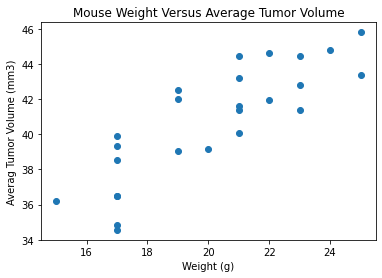

In [116]:
#scatter plot showing avg tumor size vs. mouse weight for Capulin
plt.scatter(Cap_tum_avg['Weight (g)'],Cap_tum_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(stats.pearsonr(Cap_tum_avg['Weight (g)'],Cap_tum_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor size is {correlation}")

The correlation between mouse weight and average tumor size is 0.84


In [159]:
# linear regression on weight versus tumor size
slope, intercept, rvalue, pvalue, std_err = stats.linregress(Cap_tum_avg['Weight (g)'],Cap_tum_avg['Tumor Volume (mm3)'])

print(f"Slope = {slope}")
print(f"Intercept = {intercept}")
print(f"Regress Value = {rvalue}")
print(f"Pvalue = {pvalue}")
print(f"Standard Deviation = {std_err}")

Slope = 0.9544396890241045
Intercept = 21.552160532685015
Regress Value = 0.8419363424694718
Pvalue = 1.3225722434712642e-07
Standard Deviation = 0.1275435903320134


In [160]:
# equation of line to calculate predicted weight
fit = slope * Cap_tum_avg['Weight (g)'] + intercept


The r-squared is: 0.7088568047708717


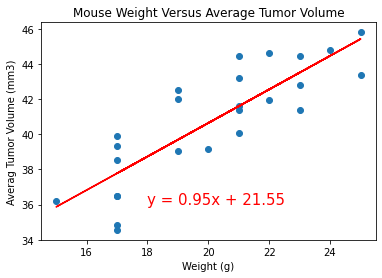

In [161]:
# Plot the linear model on top of scatter plot 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(Cap_tum_avg['Weight (g)'],Cap_tum_avg['Tumor Volume (mm3)'])
plt.plot(Cap_tum_avg['Weight (g)'],fit, "r-")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.annotate(line_eq,(18,36), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()